In [1309]:
import numpy as np
import open3d as o3d
from math import *
from copy import deepcopy
import os
from matplotlib import pyplot as plt

## Create a rotated cylinder inside a voxel cube

In [1317]:
voxel_sim = np.ones((20, 20, 20), dtype=np.int32)
voxel_sim.shape

(20, 20, 20)

We create a 4d grid with the coordinates of the indices as a 4th dimension

In [1318]:
shape = voxel_sim.shape
P_rel = np.stack(np.meshgrid(np.arange(0, shape[0]),
                     np.arange(0, shape[1]),
                     np.arange(0, shape[2]), indexing='ij'), axis=3)

we set the radius and height of the cylinder

In [1319]:
height_z = 20
radius = 5

We get the voxels inside a cylinder rotated with angle defined

In [1320]:
center =[ti/2 for ti in shape]
#rotation in (x,z)
angle = radians(180)
P_initial = deepcopy(P_rel)
#here we substruct the center
P_initial = P_initial[:,:,:,:]- center
#take the voxels inside the cylinder
#taking z after applying projection
inside_high = (P_initial[:,:,:,2]*cos(angle)+P_initial[:,:,:,0]*sin(angle))<= (0.5*height_z)
inside_low = (P_initial[:,:,:,2]*cos(angle)+P_initial[:,:,:,0]*sin(angle))>= (-0.5*height_z)
#projection of x
P_initial[:,:,:,0] = (P_initial[:,:,:,0]*cos(angle)- P_initial[:,:,:,2]*sin(angle))
#getting circles inside
inside_circle = np.linalg.norm(P_initial[:,:,:,:2],axis=3)<=radius
#the voxels inside the cylinder
voxels_in_cyl = inside_high & inside_low & inside_circle



In [1321]:
#remove the element of cylinder from vox_sim
for element in P_rel[voxels_in_cyl]:
    voxel_sim[element[0]][element[1]][element[2]] = 0

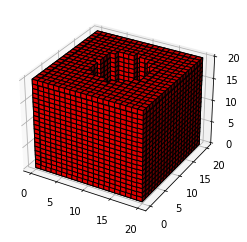

In [1322]:
#plot voxel_sim after removing cylinder
ax = plt.figure().add_subplot(projection='3d')

ax.voxels(voxel_sim, facecolors='red', edgecolor='k')

plt.show()